Zakaria Bouzada, Ifeanyi Agu, Kai Larinen

A project that builds a predictive model where the output is “MEDV - Median value of owner-occupied homes in $1000’s”

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
# Imports
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
# Import necessary libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Load the dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
data = pd.read_csv(url)

# Step 0: EDA (Exploratory Data Analysis)
# Display basic statistics
print(data.describe())

       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

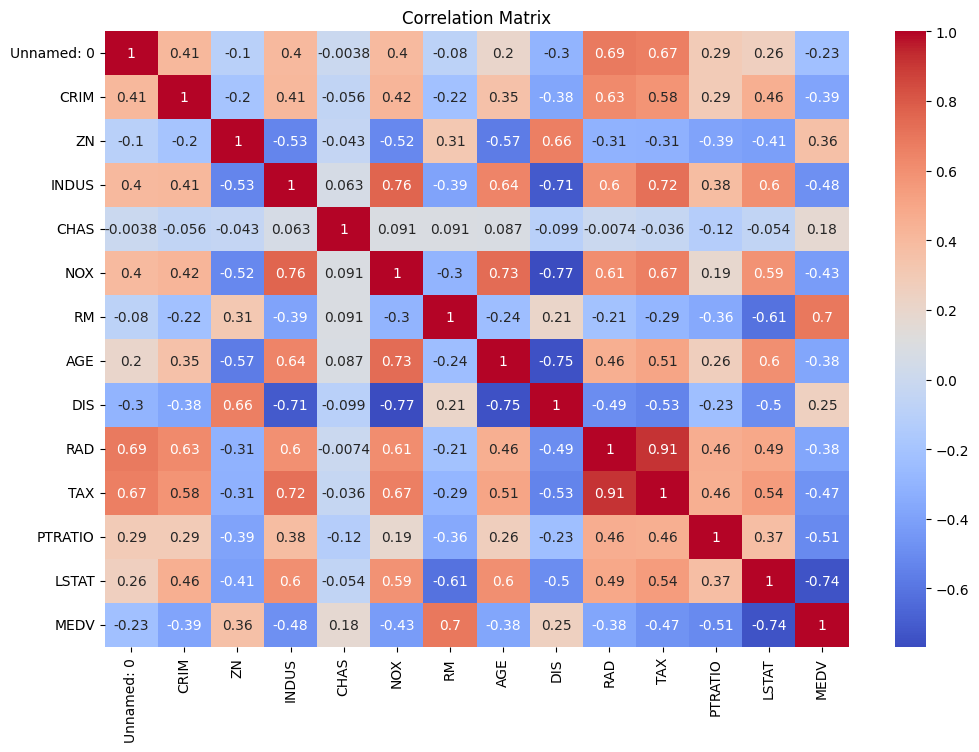

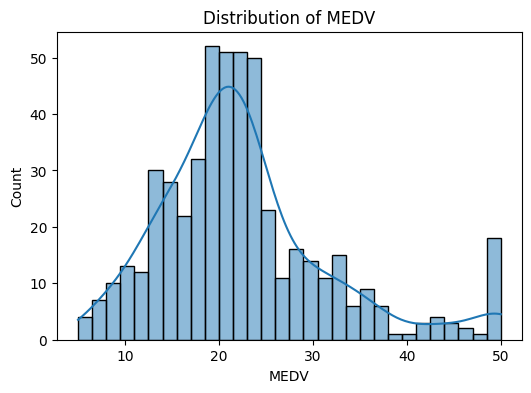

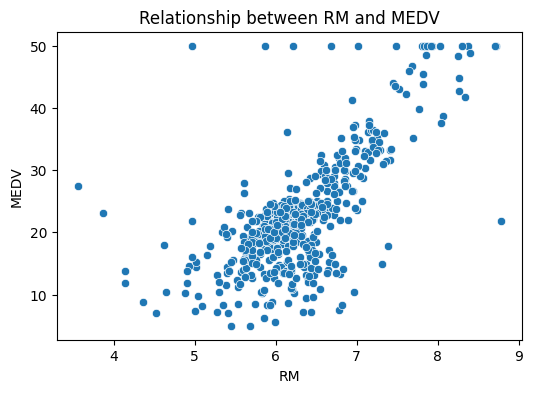

In [ ]:
# Visualize correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plot the distribution of the target variable 'MEDV'
plt.figure(figsize=(6, 4))
sns.histplot(data['MEDV'], kde=True, bins=30)
plt.title('Distribution of MEDV')
plt.show()

# Scatter plot to visualize the relationship between RM and MEDV
plt.figure(figsize=(6, 4))
sns.scatterplot(x='RM', y='MEDV', data=data)
plt.title('Relationship between RM and MEDV')
plt.show()

# Step 1: Data Processing and choosing model
# Define features (X) and target (y)
X = data.drop('MEDV', axis=1)
y = data['MEDV']

In [ ]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 4: Performance Evaluation of Linear Regression
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R2 Score: {r2_lr}')


Linear Regression MSE: 22.956461766146415
Linear Regression R2 Score: 0.6869592597458283


In [ ]:
#Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Performance Evaluation of Decision Tree
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree MSE: {mse_dt}')
print(f'Decision Tree R2 Score: {r2_dt}')

# Comparison of the two models
print("\nComparison of Models:")
print(f'Linear Regression MSE: {mse_lr}, R2: {r2_lr}')
print(f'Decision Tree MSE: {mse_dt}, R2: {r2_dt}')

Decision Tree MSE: 22.75225490196078
Decision Tree R2 Score: 0.6897438817220216

Comparison of Models:
Linear Regression MSE: 22.956461766146415, R2: 0.6869592597458283
Decision Tree MSE: 22.75225490196078, R2: 0.6897438817220216


# Analysis of results

Linear Regression Results:
MSE (Mean Squared Error): 22.96

This measures the average squared difference between the predicted and actual values. Lower values are better, and an MSE of ~22.96 indicates that, on average, the predictions are off by around $\sqrt{22.96} \approx 4.79$ units of MEDV (in $$1000's, about $4790).


R² Score: 0.69
The R² score measures the proportion of variance in the target (MEDV) explained by the model. An R² of 0.69 means that ~69% of the variance in MEDV is explained by the linear model, which is a decent result but not great.

Decision Tree Results:
MSE: 22.75

The Decision Tree's MSE is slightly lower than the Linear Regression model, which means it's marginally better at predicting the target values. However, the improvement is not substantial.

R² Score: 0.69
The R² score is almost the same as the Linear Regression, meaning the Decision Tree model also explains about 69% of the variance in MEDV.

Comparison:
The results show very little difference between the two models. The Decision Tree performs slightly better in terms of both MSE and R², but the difference is minimal.

Analysis and adjustments:
The Decision Tree might be overfitting slightly since trees can fit training data perfectly, but it doesn't show a huge difference from Linear Regression here. We could try pruning the tree or using different methods like Random Forest or Gradient Boosting to see if the performance improves.

We can try tuning the hyperparameters of both models for better results. For the Decision Tree, you can adjust the maximum depth, minimum samples per leaf, etc.

For more precise results we wanted to try k-fold cross-validation instead of single train-test split.

In [ ]:
#k-fold cross-validation test


# Set up k-fold cross-validation
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
mse_scorer = make_scorer(mean_squared_error)

# Perform k-fold cross-validation for Linear Regression
cv_results_lr = cross_val_score(lr_model, X, y, cv=kf, scoring=mse_scorer)
print(f"Linear Regression: Mean MSE = {cv_results_lr.mean()}, Std = {cv_results_lr.std()}")

# Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Perform k-fold cross-validation for Decision Tree
cv_results_dt = cross_val_score(dt_model, X, y, cv=kf, scoring=mse_scorer)
print(f"Decision Tree: Mean MSE = {cv_results_dt.mean()}, Std = {cv_results_dt.std()}")


Linear Regression: Mean MSE = 23.829552689534257, Std = 5.840513167134377
Decision Tree: Mean MSE = 18.365072549019608, Std = 8.762847387994226


# K-fold cross-validation analysis

Linear Regression: The model is stable and consistent, with a relatively low standard deviation in MSE across different data splits. However, its overall performance is not particularly strong, as indicated by the higher MSE compared to Decision Tree.

Decision Tree: The Decision Tree performs better on average but has high variability, indicating that it can overfit the data and may not generalize well. The lower Mean MSE in k-fold indicates it could capture complex patterns better than linear regression but at the cost of stability.

K-fold cross-validation didn't give us much of a difference in results.

We can try implementing another approach with Random forest for more predictive and precise results. To analyze what approach may be best.

In [ ]:
# Linear Regression model
lr_model = LinearRegression()
mse_scorer = make_scorer(mean_squared_error)

# Create Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Perform k-fold cross-validation for Random Forest
cv_results_rf = cross_val_score(rf_model, X, y, cv=kf, scoring=mse_scorer)
print(f"Random Forest: Mean MSE = {cv_results_rf.mean()}, Std = {cv_results_rf.std()}")

Random Forest: Mean MSE = 10.8071389312549, Std = 3.9964853010967882


In [ ]:


# Train Linear Regression model again
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Train Decision Tree model again
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Train Random Forest model again
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Comparison of the three models
print("\nComparison of Models:")
print(f'Linear Regression MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}')
print(f'Decision Tree MSE: {mse_dt:.2f}, R2: {r2_dt:.2f}')
print(f'Random Forest MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}')


Comparison of Models:
Linear Regression MSE: 22.96, R2: 0.69
Decision Tree MSE: 22.75, R2: 0.69
Random Forest MSE: 8.59, R2: 0.88


#Comparison of Random Forest Results with Linear Regression and Decision Tree
Random Forest offers much better predictive accuracy and a higher capacity to explain the variance in the target variable compared to both Linear Regression and Decision Tree.

It strikes a balance between capturing complex patterns (where Linear Regression fails) and avoiding overfitting (where a single Decision Tree struggles), making it the most suitable model for this task.